In [228]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2
from src.misc import load_processed_dataset, split_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
df = load_processed_dataset("aapl")
X = df.drop("Close Forecast", axis=1)
y = df["Close Forecast"]
X_train_df, X_val_df, X_test_df = split_data(X)
y_train_df, y_val_df, y_test_df = split_data(y)

X_train, X_val, X_test = X_train_df.values, X_val_df.values, X_test_df.values
y_train, y_val, y_test = y_train_df.values, y_val_df.values, y_test_df.values

X_train.shape, X_val.shape, X_test.shape

((1007, 61), (126, 61), (126, 61))

In [230]:
X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])
X_train.shape, y_train.shape

((1133, 61), (1133,))

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(1133, 61)

In [232]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

n_components = [n for n in range(X_train.shape[1], 0, -1)]
RMSEs = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_train)

    # Apply mapping (transform)
    _X_train = pca.transform(X_train)
    _X_test = pca.transform(X_test)
    model = LinearRegression()
    model.fit(_X_train, y_train)
    preds = model.predict(_X_test)
    RMSEs.append(np.sqrt(mean_squared_error(y_test, preds)))

results = pd.DataFrame({
    "n_components": n_components,
    "rmse": RMSEs
})
results.sort_values(by="rmse").head(10)

,n_components,rmse
37,24,3.330304
36,25,3.511674
31,30,3.809154
32,29,3.840094
30,31,3.841723
33,28,3.899748
34,27,4.113527
29,32,4.147314
28,33,4.161645
35,26,4.187870


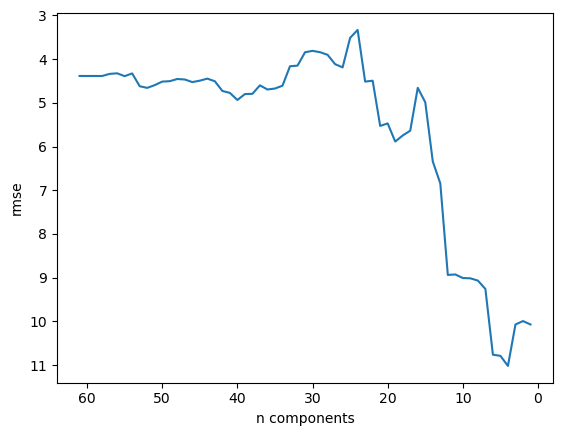

In [233]:
fig, ax = plt.subplots()
ax.plot(results["n_components"], results["rmse"])
ax.invert_xaxis()
ax.invert_yaxis()
plt.xlabel("n components")
plt.ylabel("rmse")
plt.show()